# Visit the Sage site for more info: https://sagecontinuum.org

In [4]:
# Install requirements
! pip install --no-cache-dir -r ../plugin-cloud-cover/requirements.txt -q
! pip install --no-cache-dir opencv-python-headless -q

In [5]:
# Download the model
! wget -q https://web.lcrc.anl.gov/public/waggle/models/Unet_epoch228a.pth -O wagglecloud_unet_300.pth

In [6]:
# Avoid an issue with the default cache dir
! export MPLCONFIGDIR="./"

In [7]:
# Check for GPU
import torch
print(f"Nvidia GPU is available: {torch.cuda.is_available()}")

Nvidia GPU is available: False


In [8]:
import cv2
image = cv2.imread("ecr-science-image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Matplotlib created a temporary cache directory at /tmp/matplotlib-lnf0xd1q because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


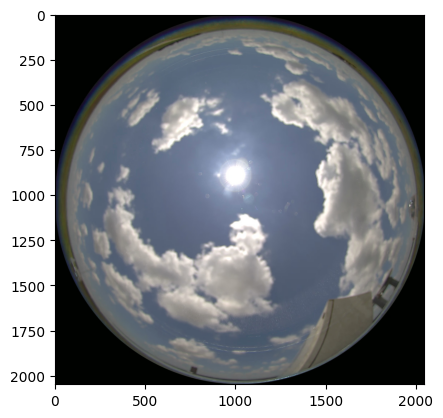

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [10]:
import sys
plugin = "../plugin-cloud-cover"
if plugin not in sys.path:
    sys.path.append(plugin)

In [11]:
from unet_module import Unet_Main
unet_main = Unet_Main()

# import warnings
# with warnings.catch_warnings():
#     warnings.simplefilter(action='ignore', category=FutureWarning)
#     unet_main = Unet_Main()

/home/jovyan/work/sage_notebooks/../plugin-cloud-cover/unet_module.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.net.load_state_dict(torch.load('wagglecloud_unet

In [12]:
threshold = 0.9
ratio, hi = unet_main.run(image, out_threshold=threshold)

2048 2048
2048 2048


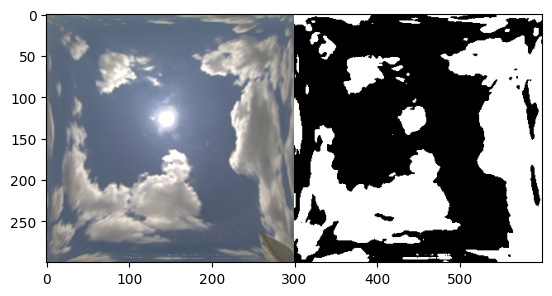

In [13]:
plt.imshow(hi)
plt.show()